In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
data=pd.read_csv('E:\\DataSets\\Uber Drives - 2016.csv')

In [84]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [85]:
data.shape

(1156, 7)

In [87]:
data.describe(percentiles=[0.25,0.50,0.75,0.8,0.85,0.9,0.95])

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
80%,12.300000
85%,14.000000
90%,17.100000


Mean value is 21. Minimum value is 0.5 whereas the max value is 12204.7. Definitely, there will be outliers.


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
START_DATE*    1156 non-null object
END_DATE*      1155 non-null object
CATEGORY*      1155 non-null object
START*         1155 non-null object
STOP*          1155 non-null object
MILES*         1156 non-null float64
PURPOSE*       653 non-null object
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [89]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

There are many missing values in PURPOSE* Column. Let's try to impute them.

In [92]:
common=pd.get_dummies(data).sum().sort_values(ascending=False).index[0]
common

'MILES*'

In [93]:
data['PURPOSE*'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: PURPOSE*, dtype: int64

Value 'Meeting' occured many times. Then, 'Meal/Entertain' , 'Errand/Supplies' , 'Customer Visit'. Let's try to assign the most frequent values to the missing values.

In [94]:
data1=data.copy()

In [95]:
data1[data1['PURPOSE*']=='Meeting']

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
10,1/10/2016 15:08,1/10/2016 15:51,Business,New York,Queens,10.8,Meeting
...,...,...,...,...,...,...,...
1142,12/29/2016 20:15,12/29/2016 20:45,Business,Kar?chi,Kar?chi,7.2,Meeting
1144,12/29/2016 23:14,12/29/2016 23:47,Business,Unknown Location,Kar?chi,12.9,Meeting
1148,12/30/2016 16:45,12/30/2016 17:08,Business,Kar?chi,Kar?chi,4.6,Meeting
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting


In [97]:
data1['CATEGORY*'].value_counts()

Business    1078
Personal      77
Name: CATEGORY*, dtype: int64

In [98]:
data1[(data1['CATEGORY*']=='Business') & (data1['PURPOSE*']=='Meeting')]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
10,1/10/2016 15:08,1/10/2016 15:51,Business,New York,Queens,10.8,Meeting
...,...,...,...,...,...,...,...
1142,12/29/2016 20:15,12/29/2016 20:45,Business,Kar?chi,Kar?chi,7.2,Meeting
1144,12/29/2016 23:14,12/29/2016 23:47,Business,Unknown Location,Kar?chi,12.9,Meeting
1148,12/30/2016 16:45,12/30/2016 17:08,Business,Kar?chi,Kar?chi,4.6,Meeting
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting


In [99]:
data1[(data1['CATEGORY*']=='Personal') & (data1['PURPOSE*']=='Meeting')]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*


In [100]:
data1[data1['CATEGORY*']=='Personal']

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
85,2/9/2016 10:54,2/9/2016 11:07,Personal,Whitebridge,Northwoods,5.3,NaN
86,2/9/2016 11:43,2/9/2016 11:50,Personal,Northwoods,Tanglewood,3.0,NaN
87,2/9/2016 13:36,2/9/2016 13:52,Personal,Tanglewood,Preston,5.1,NaN
88,2/9/2016 13:58,2/9/2016 14:02,Personal,Preston,Whitebridge,1.5,NaN
102,2/13/2016 23:45,2/14/2016 0:01,Personal,East Elmhurst,Jackson Heights,2.7,NaN
...,...,...,...,...,...,...,...
563,7/18/2016 11:40,7/18/2016 11:56,Personal,Preston,Whitebridge,4.7,Moving
573,7/19/2016 17:50,7/19/2016 18:08,Personal,Chessington,Whitebridge,4.8,NaN
574,7/20/2016 17:12,7/20/2016 17:24,Personal,Whitebridge,Edgehill Farms,2.8,NaN
575,7/20/2016 17:50,7/20/2016 17:57,Personal,Edgehill Farms,Preston,1.4,NaN


In [102]:
data1[(data1['CATEGORY*']=='Personal') & (data1['PURPOSE*']=='Meal/Entertain')]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*


In [103]:
data1[(data1['CATEGORY*']=='Personal') & (data1['PURPOSE*']=='Errand/Supplies')]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*


In [104]:
data1[(data1['CATEGORY*']=='Personal') & (data1['PURPOSE*']=='Customer Visit')]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*


In [105]:
data1[(data1['CATEGORY*']=='Personal') & (data1['PURPOSE*']=='Meeting')]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*


In [118]:
data1[(data1['CATEGORY*']=='Business') & (data1['PURPOSE*']=='Errand/Supplies')]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
14,1/11/2016 11:56,1/11/2016 12:03,Business,Flatiron District,Midtown,1.6,Errand/Supplies
19,1/12/2016 14:42,1/12/2016 14:56,Business,Lower Manhattan,Hudson Square,1.8,Errand/Supplies
21,1/12/2016 15:42,1/12/2016 15:54,Business,Hell's Kitchen,Midtown,2.0,Errand/Supplies
26,1/14/2016 21:39,1/14/2016 21:45,Business,Eagan Park,Jamestown Court,3.9,Errand/Supplies
...,...,...,...,...,...,...,...
1136,12/29/2016 13:17,12/29/2016 13:24,Business,Kar?chi,Kar?chi,1.1,Errand/Supplies
1139,12/29/2016 15:05,12/29/2016 15:16,Business,Kar?chi,Kar?chi,1.3,Errand/Supplies
1145,12/30/2016 10:15,12/30/2016 10:33,Business,Kar?chi,Kar?chi,2.8,Errand/Supplies
1146,12/30/2016 11:31,12/30/2016 11:56,Business,Kar?chi,Kar?chi,2.9,Errand/Supplies


In [116]:
data1[(data1['CATEGORY*']=='Business') & (data1['PURPOSE*']=='Customer Visit')]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit
20,1/12/2016 15:13,1/12/2016 15:28,Business,Hudson Square,Hell's Kitchen,2.4,Customer Visit
25,1/14/2016 16:29,1/14/2016 17:05,Business,Houston,Houston,21.9,Customer Visit
36,1/20/2016 13:25,1/20/2016 14:19,Business,Raleigh,Cary,40.2,Customer Visit
...,...,...,...,...,...,...,...
1117,12/26/2016 11:29,12/26/2016 11:42,Business,Lahore,Lahore,3.8,Customer Visit
1122,12/27/2016 14:49,12/27/2016 15:03,Business,Kar?chi,Unknown Location,3.1,Customer Visit
1124,12/27/2016 19:19,12/27/2016 19:50,Business,Kar?chi,Kar?chi,5.5,Customer Visit
1141,12/29/2016 19:50,12/29/2016 20:10,Business,Unknown Location,Kar?chi,4.1,Customer Visit


In [117]:
data1[(data1['CATEGORY*']=='Business') & (data1['PURPOSE*']=='Meeting')]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
10,1/10/2016 15:08,1/10/2016 15:51,Business,New York,Queens,10.8,Meeting
...,...,...,...,...,...,...,...
1142,12/29/2016 20:15,12/29/2016 20:45,Business,Kar?chi,Kar?chi,7.2,Meeting
1144,12/29/2016 23:14,12/29/2016 23:47,Business,Unknown Location,Kar?chi,12.9,Meeting
1148,12/30/2016 16:45,12/30/2016 17:08,Business,Kar?chi,Kar?chi,4.6,Meeting
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting


In [119]:
data1[(data1['CATEGORY*']=='Business') & (data1['PURPOSE*']=='Meal/Entertain')]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
15,1/11/2016 13:32,1/11/2016 13:46,Business,Midtown,Midtown East,1.7,Meal/Entertain
16,1/11/2016 14:30,1/11/2016 14:43,Business,Midtown East,Midtown,1.9,Meal/Entertain
17,1/12/2016 12:33,1/12/2016 12:49,Business,Midtown,Hudson Square,1.9,Meal/Entertain
...,...,...,...,...,...,...,...
1125,12/28/2016 8:34,12/28/2016 9:06,Business,Kar?chi,Unknown Location,10.3,Meal/Entertain
1128,12/28/2016 15:04,12/28/2016 15:39,Business,Kar?chi,Unknown Location,8.5,Meal/Entertain
1133,12/29/2016 9:44,12/29/2016 10:07,Business,Kar?chi,Unknown Location,11.6,Meal/Entertain
1134,12/29/2016 11:28,12/29/2016 12:00,Business,Unknown Location,Kar?chi,11.9,Meal/Entertain


In [121]:
# Since most of the rows are having value as 'Meeting', let's fill the missing value with it.

data['PURPOSE*'].fillna('Meeting',inplace=True)

In [122]:
data.isna().sum()

START_DATE*    0
END_DATE*      1
CATEGORY*      1
START*         1
STOP*          1
MILES*         0
PURPOSE*       0
dtype: int64

In [124]:
data.dropna(inplace=True)

In [126]:
data.isna().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [127]:
# Now we dont have any missing values

In [128]:
data.describe()

,MILES*
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


In [130]:
data['MILES*'].min()

0.5

In [131]:
data['MILES*'].max()

310.3

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
START_DATE*    1155 non-null object
END_DATE*      1155 non-null object
CATEGORY*      1155 non-null object
START*         1155 non-null object
STOP*          1155 non-null object
MILES*         1155 non-null float64
PURPOSE*       1155 non-null object
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [134]:
data.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [137]:
data1=data.copy()
data1.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meeting
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [139]:
#Let's change the datatype and format of start and end dates

data1['START_DATE*']=pd.to_datetime(data1['START_DATE*'],format="%m/%d/%Y %H:%M")

In [140]:
data1['START_DATE*']

0      2016-01-01 21:11:00
1      2016-01-02 01:25:00
2      2016-01-02 20:25:00
3      2016-01-05 17:31:00
4      2016-01-06 14:42:00
               ...        
1150   2016-12-31 01:07:00
1151   2016-12-31 13:24:00
1152   2016-12-31 15:03:00
1153   2016-12-31 21:32:00
1154   2016-12-31 22:08:00
Name: START_DATE*, Length: 1155, dtype: datetime64[ns]

In [141]:
data1['END_DATE*']=pd.to_datetime(data1['END_DATE*'],format="%m/%d/%Y %H:%M")

In [142]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
START_DATE*    1155 non-null datetime64[ns]
END_DATE*      1155 non-null datetime64[ns]
CATEGORY*      1155 non-null object
START*         1155 non-null object
STOP*          1155 non-null object
MILES*         1155 non-null float64
PURPOSE*       1155 non-null object
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


Text(0.5, 1.0, 'Trips per month')

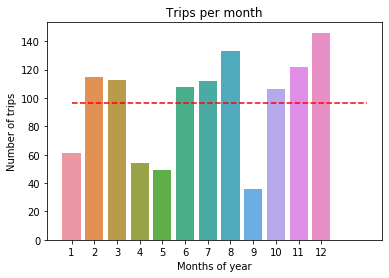

In [158]:
#Let's see number of trips per month.

a=data1['START_DATE*'].dt.month.value_counts()
sns.barplot(a.index,a.values)

b=a.sort_index()
mean=a.mean()

plt.plot([0,len(b)+1],[mean,mean],'r--')
plt.xlabel('Months of year')
plt.ylabel('Number of trips')
plt.title('Trips per month')

Most of the trips are in December month as expected. September, January, April and May months have less comparable trips.

Text(0.5, 1.0, 'Trips per month')

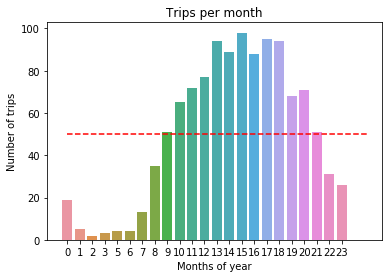

In [160]:
#Let's see number of trips per hour.

a=data1['START_DATE*'].dt.hour.value_counts()
sns.barplot(a.index,a.values)

b=a.sort_index()
mean=a.mean()

plt.plot([0,len(b)+1],[mean,mean],'r--')
plt.xlabel('Months of year')
plt.ylabel('Number of trips')
plt.title('Trips per month')

In [161]:
a

15    98
17    95
18    94
13    94
14    89
16    88
12    77
11    72
20    71
19    68
10    65
21    51
9     51
8     35
22    31
23    26
0     19
7     13
1      5
6      4
5      4
3      3
2      2
Name: START_DATE*, dtype: int64

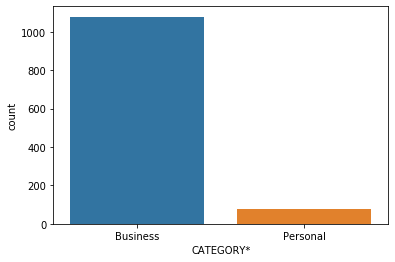

In [169]:
# Let's check the category variable.

sns.countplot(data1['CATEGORY*'])



In [170]:
data1.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

C:\Users\SYED YUNUS AHMED\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


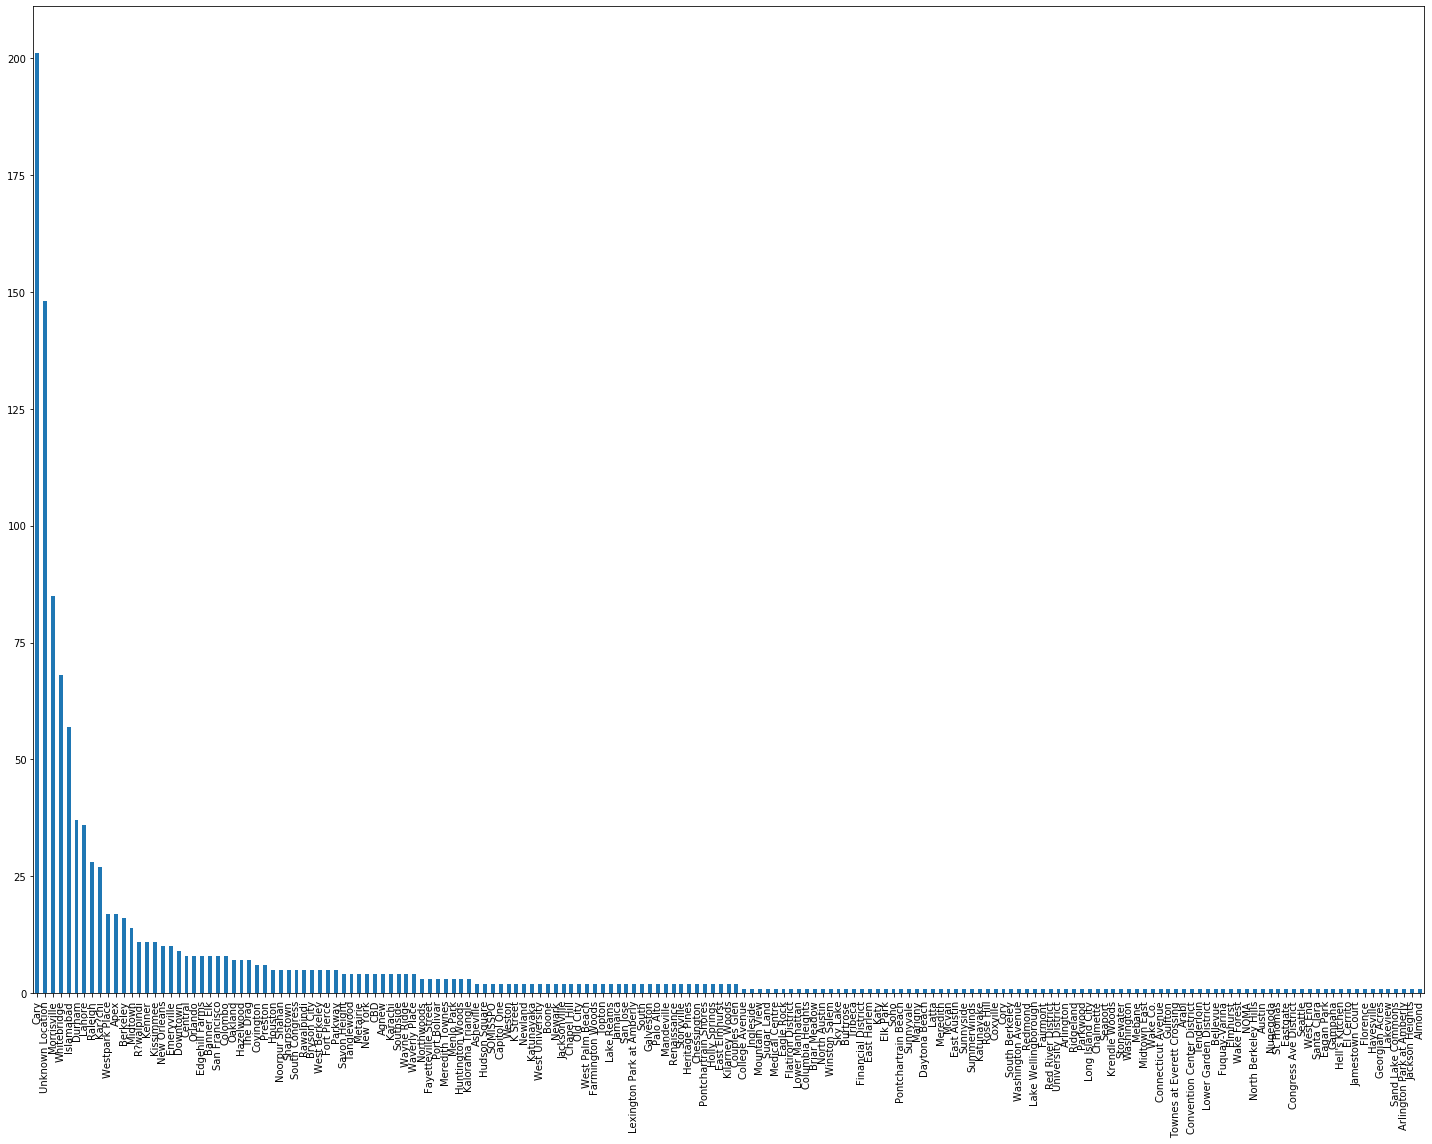

In [186]:
plt.figure(figsize=(20,16))
data1['START*'].value_counts().plot('bar')

plt.tight_layout()

Most number of trips are started at Carry.

In [188]:
#Let's see the "STOP" feature

data1['STOP*'].value_counts()

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
                   ... 
Jackson Heights       1
Coxville              1
Winston Salem         1
Briar Meadow          1
Almond                1
Name: STOP*, Length: 188, dtype: int64

As we can see, most number of stops are also in carry. We can infer that driver is intrested to work within carry itself